In [62]:
import os
import csv
import codecs
import numpy

In [63]:
def readAlltlogs():
    path = '.\\PJ0009\\data\\tlogs_' #文件夹目录  
    files= os.listdir(path) #得到文件夹下的所有文件名称  
    tlogs = []
    for file in files: #遍历文件夹
         sentence = (file.split('.')[0]).split('_')[3]
         block = (file.split('.')[0]).split('_')[2]
         if not os.path.isdir(file): #判断是否是文件夹，不是文件夹才打开  
              f = open(path+"\\"+file, 'r', encoding = 'utf8'); #打开文件
              reader = csv.reader(f)
              flag = 0
              for line in reader:
                #print(line)
                flag = flag + 1
                if flag ==1 or flag==2:
                    continue
                if flag > 2:
                    #add sentence on tlogs
                    temp = line
                    temp.append(block)
                    temp.append(sentence)
                    tlogs.append(temp)
                    line[3] = str(int(line[3].split('.')[0])-120)
              f.close()
    #print (tlogs)
    return tlogs

In [64]:
#get and add event key into tlogList
def addEventKey(tlogList):
    temp = []
    for line in tlogList:
        
        if line[3] == '-120':
            line.append(line[4])
            temp = line
        else:
            if len(line[4])>len(temp[4]):
                n = len(line[4])-1
                str1 = line[4][n]
                line.append(str1)
            if len(line[4])<len(temp[4]):
                line.append('B')
            temp = line
    return tlogList

In [65]:
def deleteTheRows(tlogRows):
    flag = 0
    deleteList = []
    for line in tlogRows:
        if len(line)== 7:
            #print(line)
            deleteList.append(flag-1)
            deleteList.append(flag)
        flag = flag + 1
    #delete from the back (biggest index)
    deleteList1 = sorted(deleteList, reverse=True)
    for item in deleteList1:
        #print(tlogRows[item])
        del tlogRows[item]
    return tlogRows
            

In [66]:
def isNumber(s):
    try:
        float(s)
        return True
    except ValueError:
        pass
        return False

In [141]:
deleteTheRows(addEventKey(readAlltlogs()))


[['502', '1', '1487340082506', '-120', 'ä', '1', '112', 'ä'],
 ['502', '2', '1487340082932', '306', 'ää', '1', '112', 'ä'],
 ['502', '3', '1487340083507', '881', 'ään', '1', '112', 'n'],
 ['502', '4', '1487340084083', '1457', 'äänr', '1', '112', 'r'],
 ['502', '5', '1487340084462', '1836', 'äänrs', '1', '112', 's'],
 ['502', '6', '1487340084925', '2299', 'äänrst', '1', '112', 't'],
 ['502', '7', '1487340085512', '2886', 'äänrstä', '1', '112', 'ä'],
 ['502', '8', '1487340085967', '3341', 'äänrstän', '1', '112', 'n'],
 ['502', '9', '1487340086309', '3683', 'äänrstän ', '1', '112', ' '],
 ['502', '10', '1487340086723', '4097', 'äänrstän j', '1', '112', 'j'],
 ['502', '11', '1487340087191', '4565', 'äänrstän jä', '1', '112', 'ä'],
 ['502', '12', '1487340087571', '4945', 'äänrstän jäl', '1', '112', 'l'],
 ['502', '13', '1487340087903', '5277', 'äänrstän jälk', '1', '112', 'k'],
 ['502', '14', '1487340088165', '5539', 'äänrstän jälki', '1', '112', 'i'],
 ['502', '15', '1487340088701', '6075'

In [146]:
def getTimeList():
    import numpy as np
    tlogList = deleteTheRows(addEventKey(readAlltlogs()))
    timeList1 = []
    timeList2 = []
    timeList3 = []
    timeList4 = []
    for line in tlogList:
        if isNumber(line[3]):
            if line[3]=='-120':
                lastTime = float(line[3])
            else:
                currentTime = float(line[3])
                timeDur = currentTime - lastTime
                if line[5]=='1':
                    timeList1.append(timeDur)
                if line[5]=='2':
                    timeList2.append(timeDur)
                if line[5]=='3':
                    timeList3.append(timeDur)
                if line[5]=='4':
                    timeList4.append(timeDur)
                lastTime = currentTime
        else:
            continue
    
    return [timeList1,timeList2,timeList3,timeList4]
            

In [14]:
max(t)

10637.0

In [16]:
len(t)

37117

In [20]:
sorted(t)[1:-1:len(t)//20]

[14.0,
 148.0,
 166.0,
 191.0,
 219.0,
 249.0,
 275.0,
 299.0,
 322.0,
 346.0,
 371.0,
 395.0,
 420.0,
 448.0,
 479.0,
 520.0,
 568.0,
 643.0,
 751.0,
 1005.0,
 6022.0]

In [13]:
import matplotlib.pyplot as plt

In [14]:
plt.plot(sorted(t))

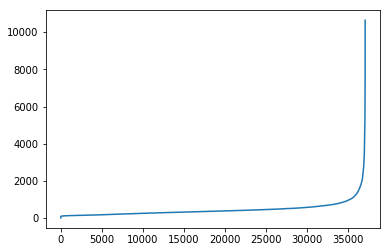

In [15]:
plt.show()

In [11]:
sorted(t)[1:-1:len(t)//30]

[14.0,
 138.0,
 153.0,
 166.0,
 183.0,
 201.0,
 219.0,
 240.0,
 260.0,
 275.0,
 294.0,
 309.0,
 322.0,
 343.0,
 356.0,
 371.0,
 387.0,
 403.0,
 420.0,
 438.0,
 458.0,
 479.0,
 505.0,
 531.0,
 568.0,
 615.0,
 675.0,
 751.0,
 890.0,
 1208.0,
 7063.0]

In [80]:
  
def writeCSV(title, tList):
    import csv
    with open(title+'.csv','a+',encoding='utf8',newline = '')  as f:
        f_csv = csv.writer(f)
        f_csv.writerow(['t'])
        for item in tList:
            f_csv.writerow([item])
    f.close()

In [81]:

t = getTimeList()
writeCSV('test', t)

mean = 453.5023304685185
std = 406.58209592744413


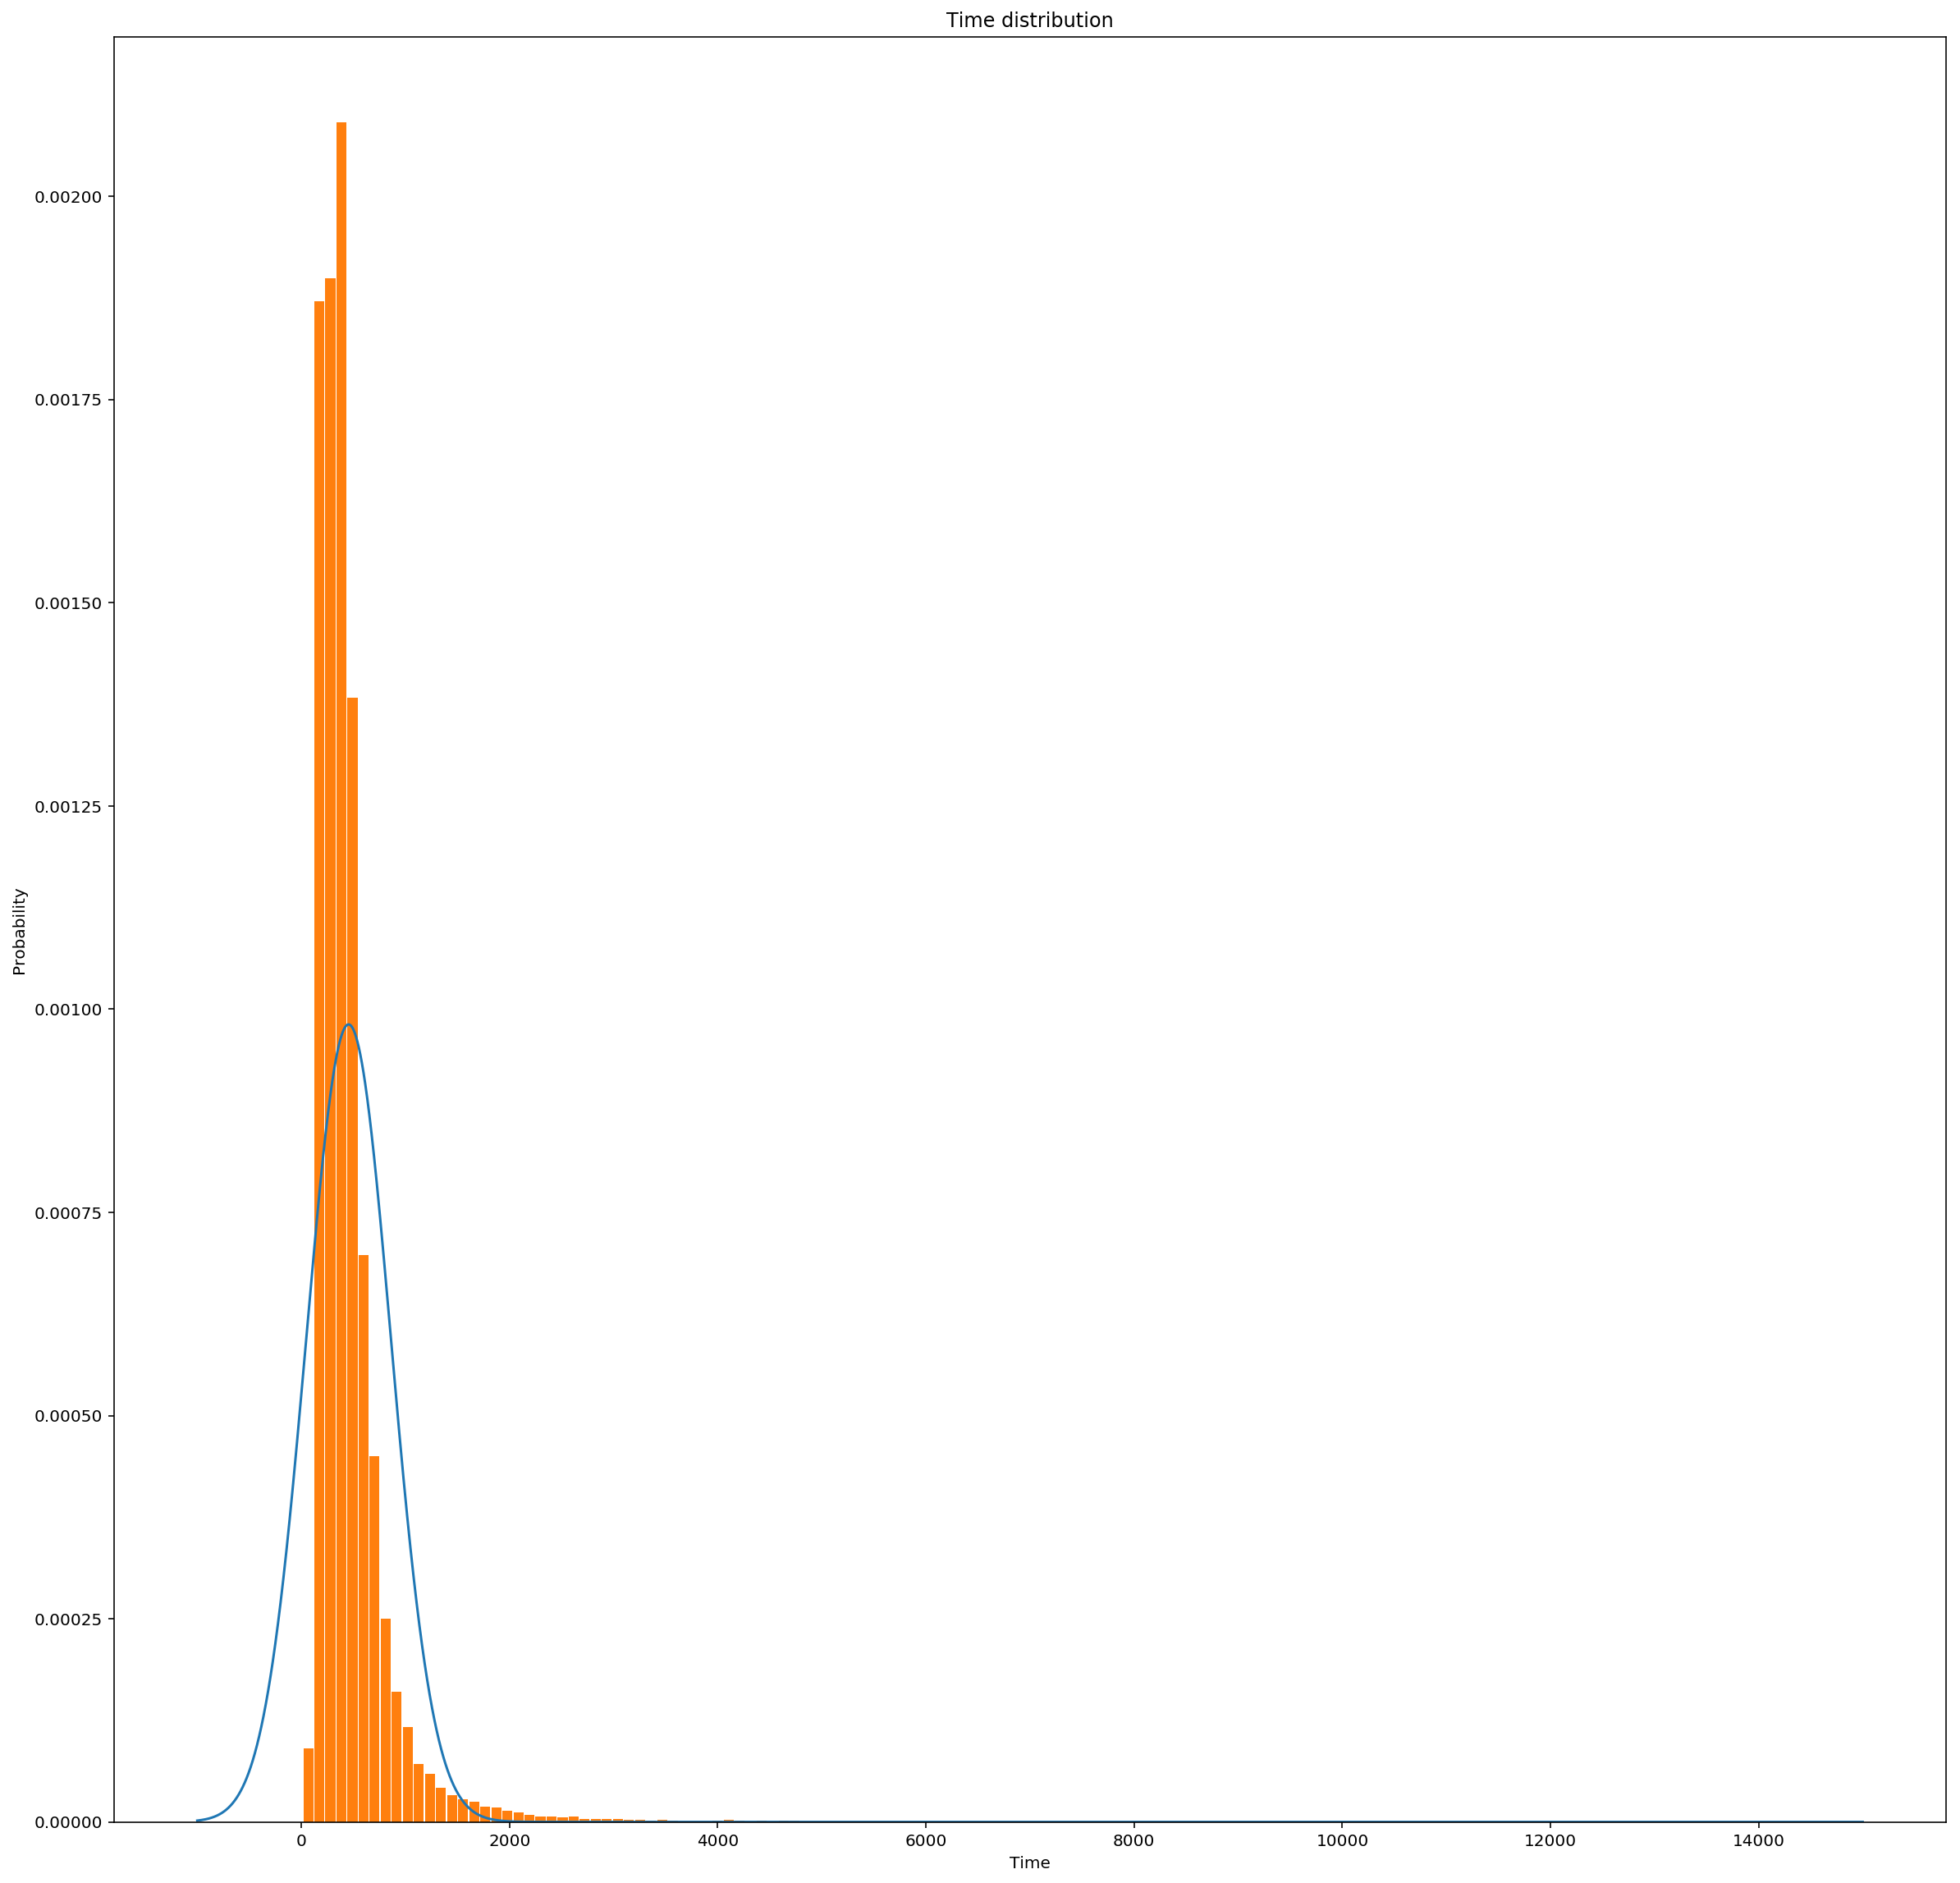

In [116]:
import pandas as pd # 导入另一个包“pandas” 命名为 pd，理解成pandas是在 numpy 基础上的升级包
import numpy as np #导入一个数据分析用的包“numpy” 命名为 np
import matplotlib.pyplot as plt # 导入 matplotlib 命名为 plt，类似 matlab，集成了许多可视化命令

#jupyter 的魔术关键字（magic keywords）
#在文档中显示 matplotlib 包生成的图形
# 设置图形的风格
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'


data = pd.read_csv('test.csv')
time = data["t"] 

mean = time.mean()
std = time.std()
print('mean = '+str(mean))
print('std = '+str(std))

#正态分布的概率密度函数。可以理解成 x 是 mu（均值）和 sigma（标准差）的函数
def normfun(x,mu,sigma):
    pdf = np.exp(-((x - mu)**2)/(2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
    return pdf

# 设定 x 轴前两个数字是 X 轴的开始和结束，第三个数字表示步长，或者区间的间隔长度
x = np.arange(-1000,15000,1) 
#设定 y 轴，载入刚才的正态分布函数
y = normfun(x, mean, std)
plt.figure(figsize=(20,20)) 
plt.plot(x,y)
#画出直方图，最后的“normed”参数，是赋范的意思，数学概念
plt.hist(time, bins=100, rwidth=0.9, normed=True)
plt.title('Time distribution')
plt.xlabel('Time')
plt.ylabel('Probability')
#输出
plt.show()




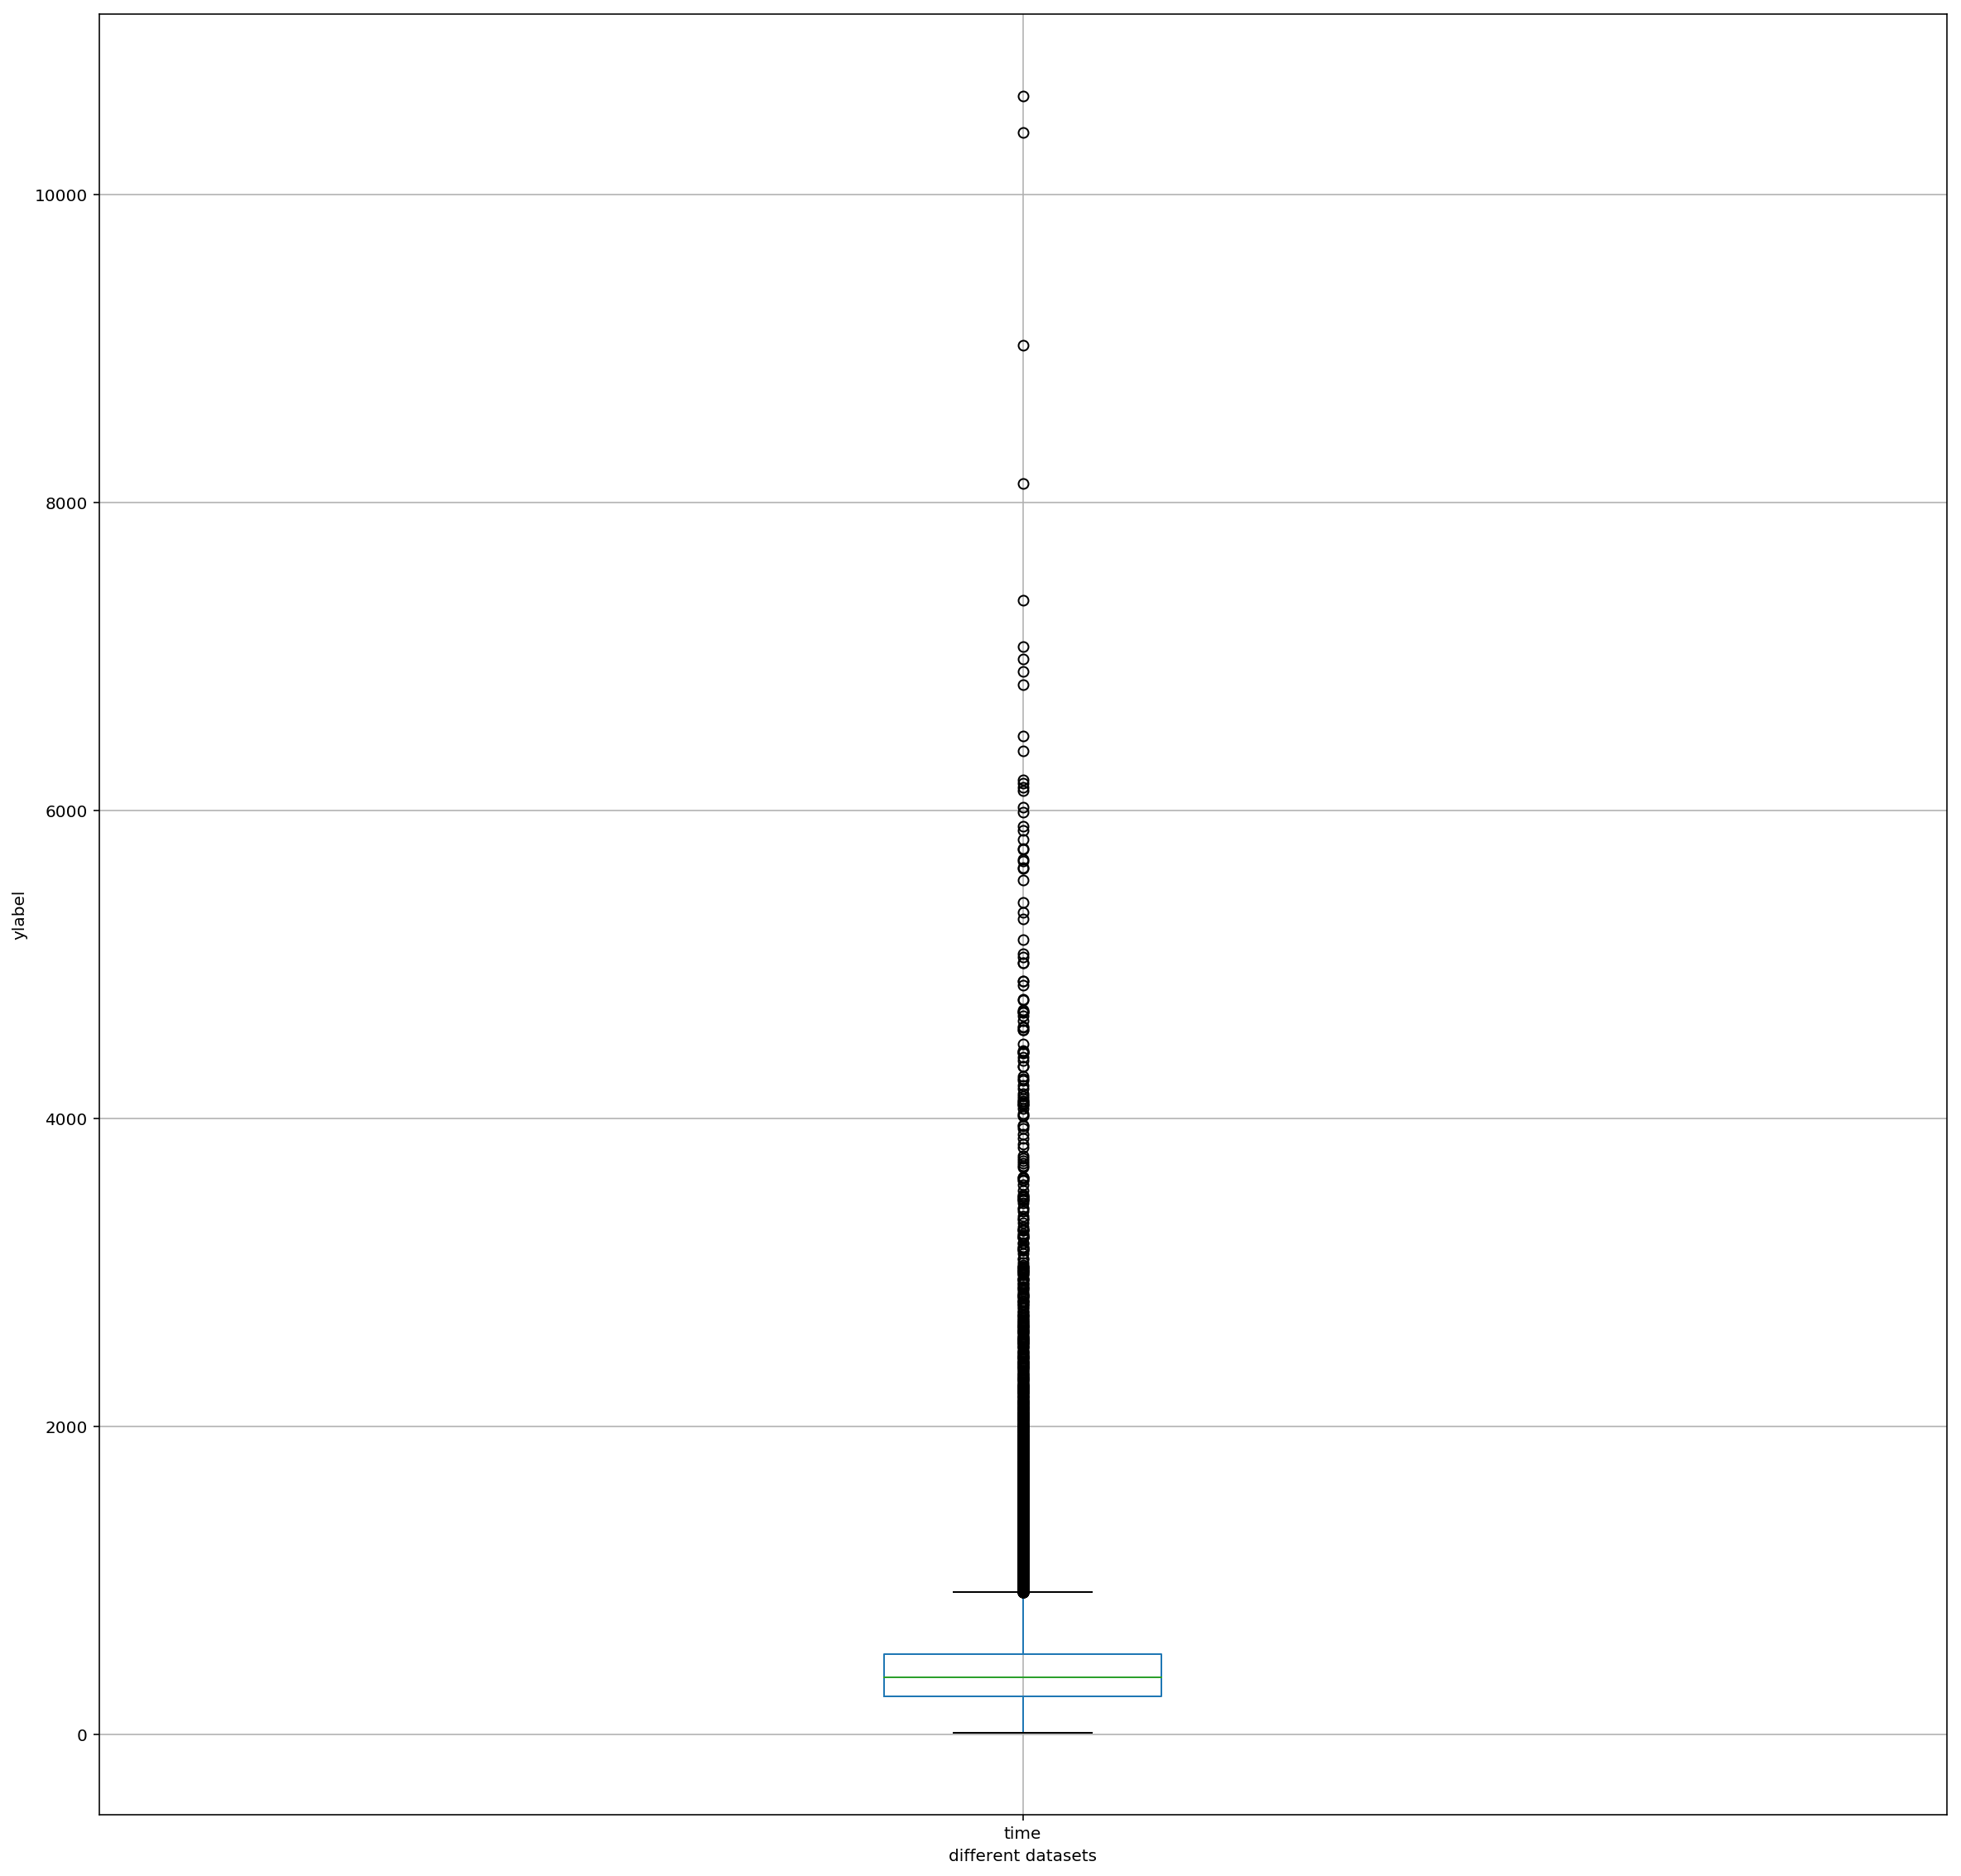

In [127]:
# -*- coding:utf-8 -*-  

  
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  

t = getTimeList()
  
data = pd.DataFrame({  
    "time":t  
})  
  
#draw 
plt.figure(figsize=(20,20)) 
data.boxplot()

plt.ylabel("ylabel")  
plt.xlabel("different datasets") 

plt.show()  

In [229]:
# upperBound in box chart for block
def upperBound(block):
    import numpy as np 
    
    if block=='all':
        t1 = getTimeList()[0]
        t2 = getTimeList()[1]
        t3 = getTimeList()[2]
        t4 = getTimeList()[3]
        t = t1+t2+t3+t4
                
    else:
        t = getTimeList()[block-1]
    temp = np.percentile(t,75)-np.percentile(t,25)
    upperBound = np.percentile(t,75) + 1.5*temp

    #print(upperBound)
    return upperBound



In [230]:
upperBound(1)
upperBound(2)
upperBound(3)
upperBound(4)
upperBound('all')

841.5
913.5
928.5
1048.0
925.0


In [ ]:
# For all: tmax = 925 ms (same as the upper line in the box plot)

# For Block1: tmax = 841.5
# For Block2: tmax = 913.5
# For Block3: tmax = 928.5
# For Block4: tmax = 1048.0



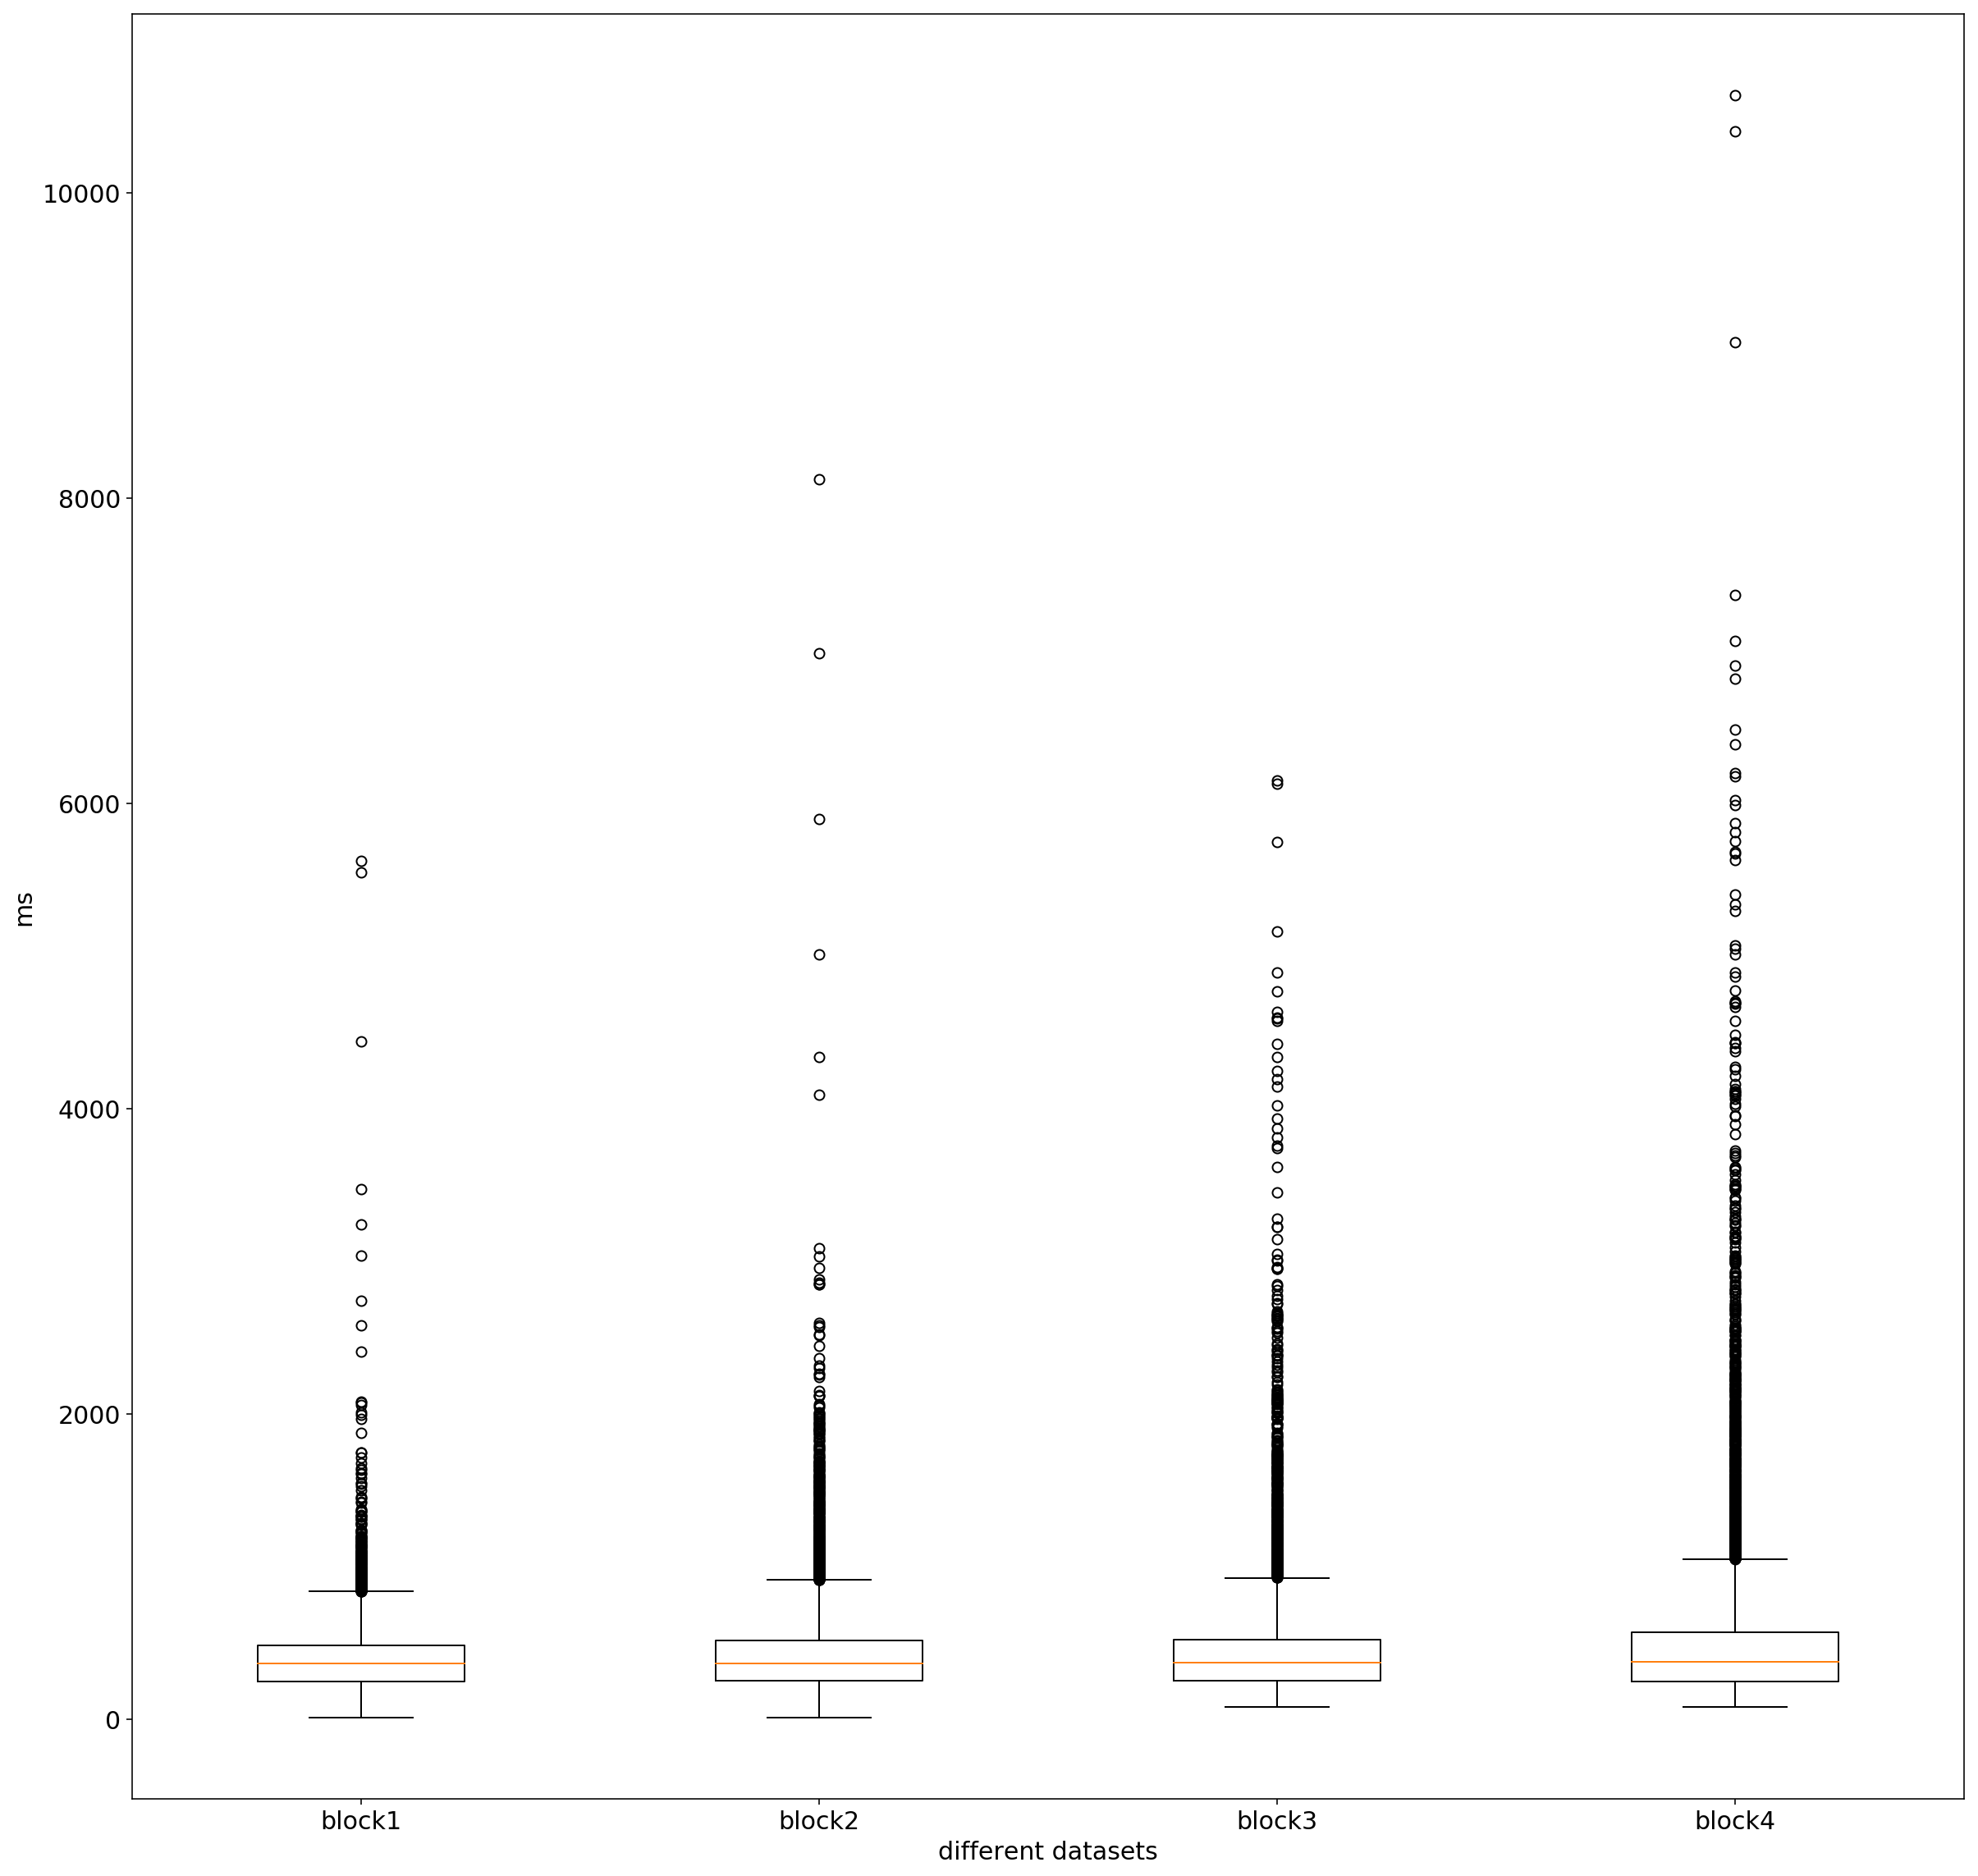

In [172]:
#draw box chart for 4 blocks
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  

t1 = getTimeList()[0]
t2 = getTimeList()[1]
t3 = getTimeList()[2]
t4 = getTimeList()[3]


plt.figure(figsize=(20,20))
plt.boxplot((t1,t2,t3,t4),labels=("block1","block2","block3","block4"))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("ms", fontsize=15)  
plt.xlabel("different datasets", fontsize=15)


plt.show()  

9103
9063
9291
9660
